In [1]:
import numpy as np
import pandas as pd
import cvxpy
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = pd.read_csv('clinics.csv')

In [3]:
data = pd.read_excel('2020_DD_NWM_OFDA_clinics.xlsx')

In [4]:
data.head()

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName
0,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1406221,0.0,NaN,1963-07-18 00:00:00,2020-01-02,60,10100,NWM,"PeriodicX, ProphyAd, FMP, OralHygIn",10HYMODEA
1,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1456438,0.0,NaN,1050043,2020-01-02,60,41200,NWM,"PrSclRtPl-LL, PrSclRtPl-UL, GingIrrQd-LL, Ging...",10HYIARIAS
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,21600,DD,BORGA,14HYHPATEL
3,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1181395,0.0,Late Cancellation,6306,2020-01-02,60,124820,NWM,"LimitedEx, CrwnPrCrS#30",10DRLHARBR
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,26900,DD,PALSIS NON INS $175,14HYMSANCH


# EDA

In [5]:
data['AMOUNT'] = data['AMOUNT']/100

Add a ratio column

In [6]:
data['ratio'] = data['AMOUNT'] / data['APPTLEN']

In [7]:
#data = data.drop(['ApptStartUTCDateTime', 'ApptEndUTCDateTime', 'LateFlag',
#                 'BROKENREASON', 'PATID'], axis = 1)

In [8]:
data

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName,ratio
0,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1406221,0.0,NaN,1963-07-18 00:00:00,2020-01-02,60,101.0,NWM,"PeriodicX, ProphyAd, FMP, OralHygIn",10HYMODEA,1.683333
1,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1456438,0.0,NaN,1050043,2020-01-02,60,412.0,NWM,"PrSclRtPl-LL, PrSclRtPl-UL, GingIrrQd-LL, Ging...",10HYIARIAS,6.866667
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,216.0,DD,BORGA,14HYHPATEL,3.600000
3,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1181395,0.0,Late Cancellation,6306,2020-01-02,60,1248.2,NWM,"LimitedEx, CrwnPrCrS#30",10DRLHARBR,20.803333
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,269.0,DD,PALSIS NON INS $175,14HYMSANCH,4.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26308,2020-12-30 22:30:00,2020-12-30 23:00:00,16,30,1709975,0.0,NaN,1062748,2020-12-30,30,0.0,NWM,**DELRET,11DRPNAIRI,0.000000
26309,2020-12-30 22:30:00,2020-12-30 23:00:00,16,30,1711037,0.0,NaN,1075049,2020-12-30,30,0.0,DD,FOLLOW UP,14DRJLUNDG,0.000000
26310,2020-12-30 23:00:00,2020-12-31 00:00:00,17,0,1609755,0.0,NaN,16104,2020-12-30,60,121.0,OFDA,"PeriodicX, ProphyAd, OralHygIn",03HYCMILTO,2.016667
26311,2020-12-30 23:00:00,2020-12-31 00:00:00,17,0,1676718,0.0,NaN,1001072,2020-12-30,60,147.0,OFDA,"PeriodicX, 4 BWX, PerMaint, OralHygIn",02HYAMADRI,2.450000


Add a column to categorize appointments

In [9]:
data['category'] = data['AMOUNT']

In [10]:
for i in range (0, len(data)):
    if (data['category'].iloc[i] <= 100):
        data['category'].iloc[i] = 'water'
    elif(data['category'].iloc[i] >= 2000):
        data['category'].iloc[i] = 'rock'
    else :
        data['category'].iloc[i] = 'sand'

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/3237541663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'].iloc[i] = 'sand'


In [11]:
data

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName,ratio,category
0,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1406221,0.0,NaN,1963-07-18 00:00:00,2020-01-02,60,101.0,NWM,"PeriodicX, ProphyAd, FMP, OralHygIn",10HYMODEA,1.683333,sand
1,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1456438,0.0,NaN,1050043,2020-01-02,60,412.0,NWM,"PrSclRtPl-LL, PrSclRtPl-UL, GingIrrQd-LL, Ging...",10HYIARIAS,6.866667,sand
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,216.0,DD,BORGA,14HYHPATEL,3.600000,sand
3,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1181395,0.0,Late Cancellation,6306,2020-01-02,60,1248.2,NWM,"LimitedEx, CrwnPrCrS#30",10DRLHARBR,20.803333,sand
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,269.0,DD,PALSIS NON INS $175,14HYMSANCH,4.483333,sand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26308,2020-12-30 22:30:00,2020-12-30 23:00:00,16,30,1709975,0.0,NaN,1062748,2020-12-30,30,0.0,NWM,**DELRET,11DRPNAIRI,0.000000,water
26309,2020-12-30 22:30:00,2020-12-30 23:00:00,16,30,1711037,0.0,NaN,1075049,2020-12-30,30,0.0,DD,FOLLOW UP,14DRJLUNDG,0.000000,water
26310,2020-12-30 23:00:00,2020-12-31 00:00:00,17,0,1609755,0.0,NaN,16104,2020-12-30,60,121.0,OFDA,"PeriodicX, ProphyAd, OralHygIn",03HYCMILTO,2.016667,sand
26311,2020-12-30 23:00:00,2020-12-31 00:00:00,17,0,1676718,0.0,NaN,1001072,2020-12-30,60,147.0,OFDA,"PeriodicX, 4 BWX, PerMaint, OralHygIn",02HYAMADRI,2.450000,sand


correlation analysis

In [12]:
data.corr()

,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,APPTLEN,AMOUNT,ratio
TIME_HOUR,1.000000,0.021832,-0.010448,-0.009803,-0.056382,-0.033064,-0.012545
TIME_MINUTE,0.021832,1.000000,0.080633,-0.031621,-0.222988,0.023540,0.070268
APPTID,-0.010448,0.080633,1.000000,-0.000252,0.041146,0.087827,0.064562
LateFlag,-0.009803,-0.031621,-0.000252,1.000000,0.046754,0.010054,0.004260
APPTLEN,-0.056382,-0.222988,0.041146,0.046754,1.000000,0.332489,0.067918
AMOUNT,-0.033064,0.023540,0.087827,0.010054,0.332489,1.000000,0.804975
ratio,-0.012545,0.070268,0.064562,0.004260,0.067918,0.804975,1.000000


<AxesSubplot:>

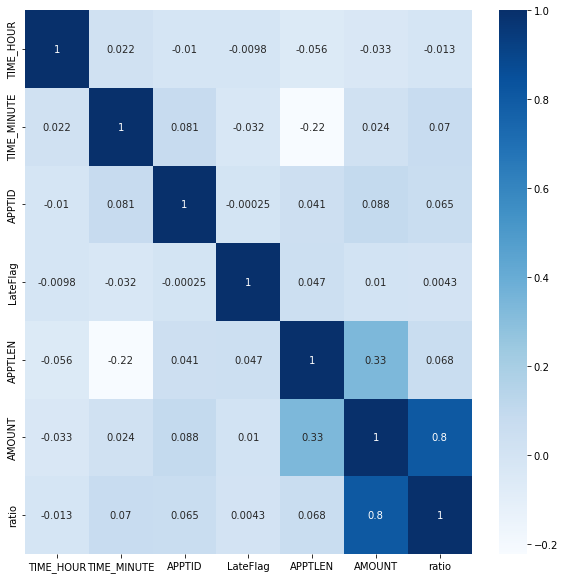

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [15]:
data['LateFlag'].value_counts()

0.0    25234
1.0      957
Name: LateFlag, dtype: int64

In [16]:
data['category'].value_counts()

sand     17215
water     8664
rock       434
Name: category, dtype: int64

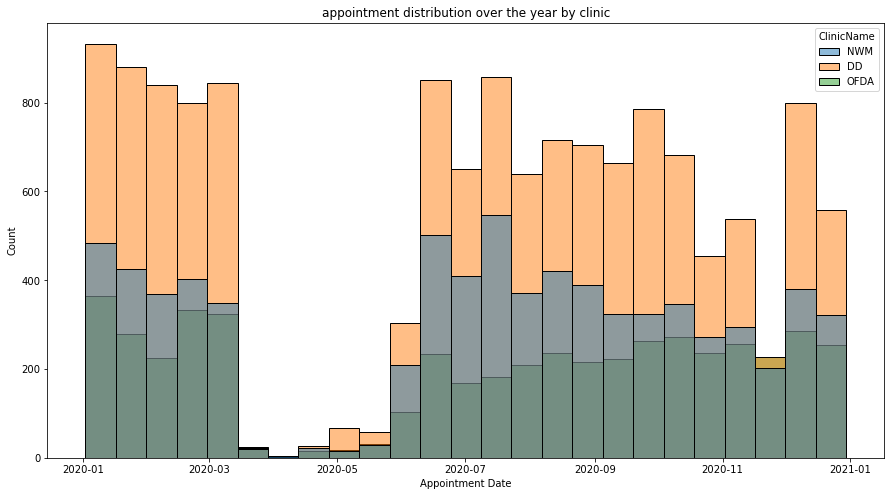

In [17]:
plt.figure(figsize = (15,8))
sns.histplot(data=data, x="APPTDATE",hue="ClinicName")
plt.title("appointment distribution over the year by clinic")
plt.xlabel("Appointment Date")
plt.show()

<AxesSubplot:xlabel='category', ylabel='Count'>

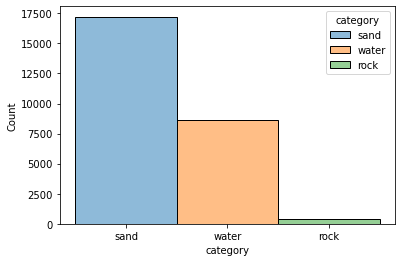

In [18]:
sns.histplot(data=data, x="category",hue = "category")

<AxesSubplot:xlabel='ClinicName', ylabel='Count'>

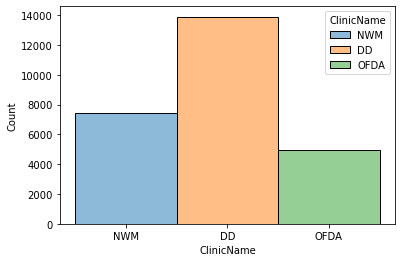

In [19]:
sns.histplot(data=data, x="ClinicName",hue = "ClinicName")

Divide data based on clinic

In [20]:
dd = data[data['ClinicName'] == 'DD']
nwm = data[data['ClinicName'] == 'NWM']
ofda = data[data['ClinicName'] == 'OFDA']

<AxesSubplot:title={'center':'OFDA'}, xlabel='category', ylabel='Count'>

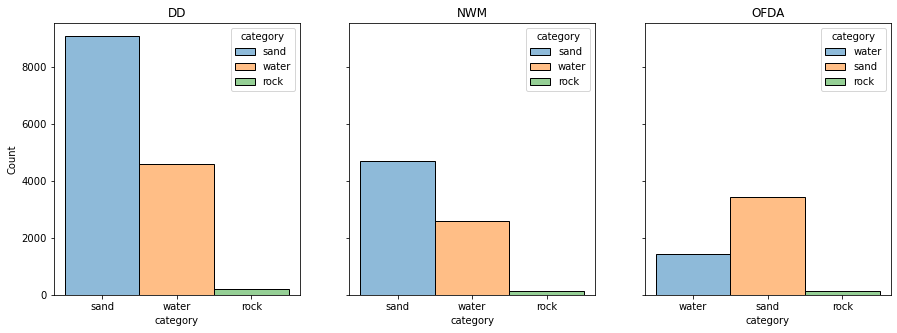

In [21]:
#fig, ax = plt.subplots()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axes[0].set_title('DD')
axes[1].set_title('NWM')
axes[2].set_title('OFDA')

sns.histplot(ax=axes[0],data=dd, x="category",hue = "category")
sns.histplot(ax=axes[1],data=nwm, x="category",hue = "category")
sns.histplot(ax=axes[2],data=ofda, x="category",hue = "category")

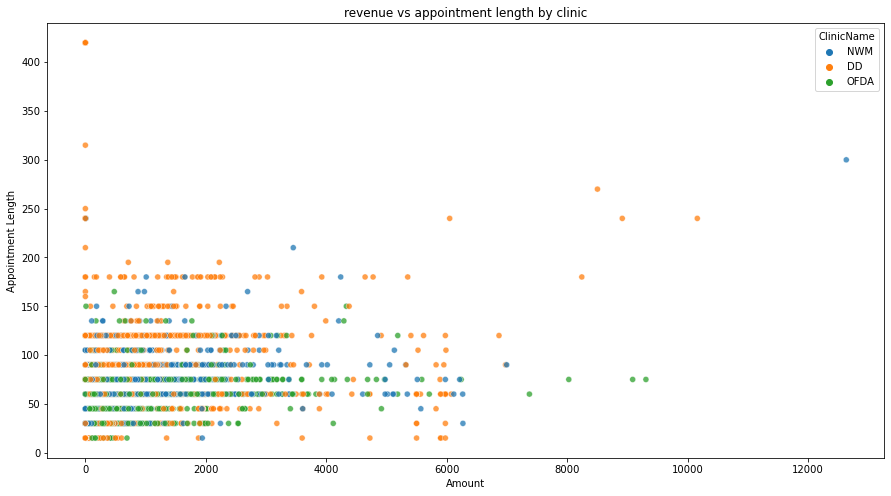

In [23]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="AMOUNT", y="APPTLEN", data=data, hue="ClinicName",alpha = 0.75)
plt.title("revenue vs appointment length by clinic")
plt.xlabel("Amount")
plt.ylabel("Appointment Length")
plt.show()

<AxesSubplot:title={'center':'OFDA'}, xlabel='LateFlag', ylabel='Count'>

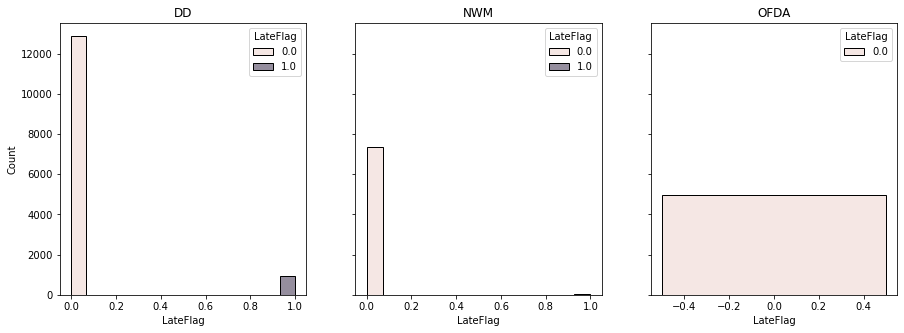

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axes[0].set_title('DD')
axes[1].set_title('NWM')
axes[2].set_title('OFDA')

sns.histplot(ax=axes[0],data=dd, x="LateFlag",hue = "LateFlag")
sns.histplot(ax=axes[1],data=nwm, x="LateFlag",hue = "LateFlag")
sns.histplot(ax=axes[2],data=ofda, x="LateFlag",hue = "LateFlag")

In [26]:
jan2_dd = dd[dd['APPTDATE'] == '2020-01-02']

In [27]:
jan2_dd

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName,ratio,category
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,216.0,DD,BORGA,14HYHPATEL,3.600000,sand
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,269.0,DD,PALSIS NON INS $175,14HYMSANCH,4.483333,sand
5,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1535662,0.0,NaN,16535,2020-01-02,60,0.0,DD,ADJ.,14DRGPALSI,0.000000,water
6,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1503962,0.0,NaN,22945,2020-01-02,60,175.0,DD,BORGA NON INS $175,14HYMSILJA,2.916667,sand
8,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1535302,0.0,NaN,21838,2020-01-02,60,216.0,DD,"pan-PeriodicX, 4 BWX, ProphyAd, FluoridVa, FMP,",10HYMODEA,3.600000,sand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-01-02 22:00:00,2020-01-02 23:00:00,16,0,1536724,0.0,NaN,6912,2020-01-02,60,110.0,DD,LIM'D,14DRGPALSI,1.833333,sand
130,2020-01-02 22:00:00,2020-01-02 23:00:00,16,0,1517819,0.0,NaN,6489,2020-01-02,60,297.0,DD,PERIO MAINT. TAKE A PANO/ TX PLAN,14HYMSILJA,4.950000,sand
132,2020-01-02 22:00:00,2020-01-02 23:00:00,16,0,1405195,0.0,NaN,19124,2020-01-02,60,125.0,DD,*PXS ONLY UPDATE REG FORMS / NON INS $125,14HYKMUELL,2.083333,sand
134,2020-01-02 22:00:00,2020-01-02 23:00:00,16,0,1533316,0.0,NaN,1072538,2020-01-02,60,177.0,DD,"LimitedEx, PA 1st, OralImags, ResCmP2s#13",14DRBBORGA,2.950000,sand


In [28]:
sum1 = jan2_dd['AMOUNT'].sum()
sum1

19608.0

In [29]:
print(jan2_dd['AMOUNT'].values)

[ 216.  269.    0.  175.  216. 1280.  175.  419.    0.  109.  101.  118.
  170.    0.   85. 2850.  118.  857.    0.  177.    0.  743.    0.   82.
    0.  160.  216.  377.  165.   82.   73.    0.  112.  110.  188.   76.
  486. 1600.    0.  619.  108.   83.    0.  100.  106.  256.  122.  101.
  136.  150.    0.    0.   83.  210.    0.  167.  559.  126.  800.  118.
  502.  398.    0.  110.  297.  125.  177. 2350.]


In [30]:
jan_week1_dd = dd[dd['APPTDATE'] <= '2020-01-05']

In [31]:
jan_week1_dd

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName,ratio,category
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,216.0,DD,BORGA,14HYHPATEL,3.600000,sand
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,269.0,DD,PALSIS NON INS $175,14HYMSANCH,4.483333,sand
5,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1535662,0.0,NaN,16535,2020-01-02,60,0.0,DD,ADJ.,14DRGPALSI,0.000000,water
6,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1503962,0.0,NaN,22945,2020-01-02,60,175.0,DD,BORGA NON INS $175,14HYMSILJA,2.916667,sand
8,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1535302,0.0,NaN,21838,2020-01-02,60,216.0,DD,"pan-PeriodicX, 4 BWX, ProphyAd, FluoridVa, FMP,",10HYMODEA,3.600000,sand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020-01-03 19:30:00,2020-01-03 21:00:00,13,30,1445951,0.0,NaN,28103,2020-01-03,90,1032.0,DD,FILLS,14DRJLUNDG,11.466667,sand
246,2020-01-03 20:00:00,2020-01-03 21:00:00,14,0,1317113,0.0,Cancellation,12392,2020-01-03,60,118.0,DD,"ProphyAd, FMP, OralHygIn",14HYKMUELL,1.966667,sand
248,2020-01-03 20:00:00,2020-01-03 21:00:00,14,0,1433064,0.0,NaN,24754,2020-01-03,60,117.0,DD,PERIO MAINT,14HYHBEAUB,1.950000,sand
249,2020-01-03 20:00:00,2020-01-03 21:00:00,14,0,1455114,0.0,No Show,20673,2020-01-03,60,53.0,DD,PXS ONLY,14HYHPATEL,0.883333,water


In [32]:
print(jan_week1_dd['AMOUNT'].values)

[ 216.  269.    0.  175.  216. 1280.  175.  419.    0.  109.  101.  118.
  170.    0.   85. 2850.  118.  857.    0.  177.    0.  743.    0.   82.
    0.  160.  216.  377.  165.   82.   73.    0.  112.  110.  188.   76.
  486. 1600.    0.  619.  108.   83.    0.  100.  106.  256.  122.  101.
  136.  150.    0.    0.   83.  210.    0.  167.  559.  126.  800.  118.
  502.  398.    0.  110.  297.  125.  177. 2350.  188.   82.  990. 1405.
  101.  449.  110.  204.  118.  452.  297.  300.  306.  101.  175.  269.
   81.  146.  164.   91.  182.  246.   93.   83.   82.  192. 1137.  184.
    0.   73.   63.   73.   83.  215.  118.   84.  274.  118.  992.    0.
 1042.   92.   64.  258.    0. 1032.  118.  117.   53.   82.]


# Knapsack

In [33]:
import cvxopt

In [34]:
P = 480
jan_dd = dd[dd['APPTDATE'] <= '2020-01-08']
weights = np.array(jan_dd['APPTLEN'])
value = np.array(jan_dd['AMOUNT'])

selection = cvxpy.Variable(len(weights), boolean = True)

weight_constraint = weights * selection <= P

total_value = value * selection

knapsack_problem = cvxpy.Problem(cvxpy.Maximize(total_value), [weight_constraint])

knapsack_problem.solve(solver=cvxpy.GLPK_MI)

/Users/yanbowang/opt/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
/Users/yanbowang/opt/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, U

35158.0

In [35]:
from ortools.algorithms import pywrapknapsack_solver

def main():
    solver = pywrapknapsack_solver.KnapsackSolver(
        pywrapknapsack_solver.KnapsackSolver.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 
        'KnapsackExample')
    
    jan_dd = dd[dd['APPTDATE'] <= '2020-01-08']

    values = jan_dd['AMOUNT'].tolist()
    weights = [jan_dd['APPTLEN'].tolist()]
    capacities = [480] #minutes

    solver.Init(values, weights, capacities)
    computed_value = solver.Solve()

    packed_items = []
    packed_weights = []
    total_weight = 0
    print('Total value =', computed_value)
    for i in range(len(values)):
        if solver.BestSolutionContains(i):
            packed_items.append(values[i])
            packed_weights.append(weights[0][i])
            total_weight += weights[0][i]
    print('Total weight:', total_weight)
    print('Packed items:', packed_items)
    print('Packed_weights:', packed_weights)

    
main()

Total value = 35158
Total weight: 480
Packed items: [2850.0, 2350.0, 2564.0, 2592.0, 5978.0, 3500.0, 5824.0, 5500.0, 4000.0]
Packed_weights: [60, 45, 45, 60, 30, 60, 90, 30, 60]


In [36]:
from ortools.algorithms import pywrapknapsack_solver

def main():
    solver = pywrapknapsack_solver.KnapsackSolver(
        pywrapknapsack_solver.KnapsackSolver.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 
        'KnapsackExample')
    
    jan_dd = dd[dd['APPTDATE'] <= '2020-01-31']

    values = jan_dd['AMOUNT'].tolist()
    weights = [jan_dd['APPTLEN'].tolist()]
    capacities = [2400] #minutes

    solver.Init(values, weights, capacities)
    computed_value = solver.Solve()

    packed_items = []
    packed_weights = []
    total_weight = 0
    print('Total value =', computed_value)
    for i in range(len(values)):
        if solver.BestSolutionContains(i):
            packed_items.append(values[i])
            packed_weights.append(weights[0][i])
            total_weight += weights[0][i]
    #print('Total weight:', total_weight)
    #print('Packed items:', packed_items)
    #print('Packed_weights:', packed_weights)
    
    
    daily_total = 0
    start = 0
    count = 0
    for j in range(0,len(packed_weights)):
        if (count < 4):
            if (daily_total + packed_weights[j] <= 480):
                daily_total = daily_total + packed_weights[j]
            else:
                print('daily weight:', sum(packed_weights[start:j]))
                print('Packed items:', packed_items[start:j])
                print('Packed_weights:', packed_weights[start:j])
                daily_total = 0
                start = j
                count += 1
        else:
            daily_total = sum(packed_weights[j-1:])
            print('daily weight:', daily_total)
            print('Packed items:', packed_items[j-1:])
            print('Packed_weights:', packed_weights[j-1:])
            break
                
        
    
main()

Total value = 134729
daily weight: 465
Packed items: [2850.0, 1600.0, 2350.0, 992.0, 2564.0, 2592.0, 5978.0, 1962.0, 3500.0, 1186.0]
Packed_weights: [60, 45, 45, 30, 45, 60, 30, 45, 60, 45]
daily weight: 540
Packed items: [1699.0, 5824.0, 5500.0, 4000.0, 300.0, 5565.0, 5953.0, 5500.0, 2012.0, 1943.0, 1500.0]
Packed_weights: [60, 90, 30, 60, 15, 60, 90, 15, 30, 30, 60]
daily weight: 525
Packed items: [2232.0, 5406.0, 800.0, 1358.0, 4449.0, 5890.0, 3320.0, 1879.0]
Packed_weights: [45, 120, 30, 45, 75, 75, 120, 15]
daily weight: 465
Packed items: [2000.0, 5900.0, 5900.0, 1580.0, 2994.0, 2734.0, 2000.0, 531.0, 1962.0, 416.0, 2000.0, 1263.0]
Packed_weights: [60, 15, 15, 45, 105, 45, 30, 15, 45, 15, 45, 30]
daily weight: 405
Packed items: [4778.0, 1879.0, 1704.0, 1943.0, 2500.0, 1941.0]
Packed_weights: [180, 45, 30, 45, 60, 45]


In [37]:
from ortools.algorithms import pywrapknapsack_solver

def main():
    solver = pywrapknapsack_solver.KnapsackSolver(
        pywrapknapsack_solver.KnapsackSolver.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, 
        'KnapsackExample')
    
    jan_dd = dd[dd['APPTDATE'] <= '2020-01-28']

    values = jan_dd['AMOUNT'].tolist()
    weights = [jan_dd['APPTLEN'].tolist()]
    capacities = [2400] #minutes

    solver.Init(values, weights, capacities)
    computed_value = solver.Solve()

    packed_items = []
    packed_weights = []
    total_weight = 0
    print('Total value =', computed_value)
    for i in range(len(values)):
        if solver.BestSolutionContains(i):
            packed_items.append(values[i])
            packed_weights.append(weights[0][i])
            total_weight += weights[0][i]
    
    daily_total = 0
    start = 0
    count = 0
    
    from itertools import combinations
    items = sorted(list(zip(packed_weights, packed_items)), reverse=True) 
    result = [[[], 0] for _ in range(5)]
    order = [0,1,2,3,4,4,3,2,1,0]
    overflow = [] 
    print(result)
    for index, i in enumerate(items): 
        target = result[order[index % len(order)]]
        if target[1] + i[0] <= 480:
            target[0].append(i)
            target[1] += i[0]
        else:
            overflow.append(i)
    overflow.sort()
    for r in result:
        ssss = [a[0] for a in overflow] 
        
        if r[1] < 480: #
            target = 480 - r[1]
            for c in range(1, len(ssss) + 1):
                allpos = combinations(ssss, c)
                allmap = {sum(a): a for a in allpos}
                if target in allmap:
                    
                    t = allmap[target]
                    for time in t:
                        index = [i for i, item in enumerate(overflow) if item[0] == time][0]
                        r[0].append(overflow[index])
                        r[1] += overflow[index][0]
                        del overflow[index]
                    break
            else:
                indexes = []
                for index, m in enumerate(overflow):
                    if r[1] + m[0] <= 480:
                        r[0].append(m)
                        r[1] += m[0]
                        indexes.append(index)
                    else:
                        break
                overflow = [item for index, item in enumerate(overflow) if index not in indexes]
            
        print('daily weight:', r[1])
        print('Packed items:', r[0])
    print(overflow)

main()

Total value = 130379
[[[], 0], [[], 0], [[], 0], [[], 0], [[], 0]]
daily weight: 480
Packed items: [(240, 6050.0), (60, 5565.0), (60, 4000.0), (45, 2350.0), (45, 2232.0), (30, 5500.0)]
daily weight: 480
Packed items: [(180, 4645.0), (75, 4449.0), (60, 3500.0), (45, 2564.0), (45, 2000.0), (30, 5978.0), (30, 2000.0), (15, 5500.0)]
daily weight: 480
Packed items: [(120, 5406.0), (75, 5890.0), (60, 2850.0), (45, 2734.0), (45, 1962.0), (45, 1186.0), (30, 1943.0), (15, 5900.0), (15, 416.0), (30, 2012.0)]
daily weight: 480
Packed items: [(120, 3320.0), (90, 5824.0), (60, 2592.0), (60, 1500.0), (45, 1962.0), (45, 1358.0), (30, 1263.0), (15, 5900.0), (15, 531.0)]
daily weight: 480
Packed items: [(105, 2994.0), (90, 5953.0), (60, 2000.0), (60, 1699.0), (45, 1600.0), (45, 1580.0), (30, 992.0), (30, 800.0), (15, 1879.0)]
[]


# Greedy

In [38]:
startdate = datetime.datetime(2020,1,2)
enddate = startdate + datetime.timedelta(days = 7)
enddate

datetime.datetime(2020, 1, 9, 0, 0)

In [39]:
def daybyAmount(startdate, data):
    time_limit = 480 
    total_time = 0 
    enddate = startdate + datetime.timedelta(days = 7) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    requests = requests.sort_values(by = 'AMOUNT', ascending=False) 
    selected = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio']) 
    i = 0
    while total_time <= time_limit and i < len(requests): 
        if (total_time + requests['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': requests['APPTLEN'].iloc[i], 
                                        'value': requests['AMOUNT'].iloc[i],
                                        'appointment ID': requests['APPTID'].iloc[i],
                                        'ratio': requests['ratio'].iloc[i]},ignore_index=True) 
            total_time += requests['APPTLEN'].iloc[i] 
            i += 1 
        #else:
        if (total_time + requests['APPTLEN'].iloc[i] > time_limit):
            i += 1
    print('Total time is:' + str(total_time))
    total_value = sum(selected['value'])
    print('Total value is:' + str(total_value))
    print(selected)

In [40]:
startdate = datetime.datetime(2020,1,2)
daybyAmount(startdate,dd)

Total time is:480
Total value is:29305.0
  length   value appointment ID       ratio
0  240.0  6050.0      1511662.0   25.208333
1   30.0  5978.0      1539688.0  199.266667
2   90.0  5953.0      1539408.0   66.144444
3   90.0  5824.0      1506660.0   64.711111
4   30.0  5500.0      1541402.0  183.333333


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1684945939.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1684945939.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1684945939.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1684945939.py:12: FutureWarning: The frame.append method is deprecated and will be r

In [41]:
def daybyRatio(startdate, data):
    time_limit = 480 
    total_time = 0 
    enddate = startdate + datetime.timedelta(days = 7) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    requests = requests.sort_values(by = 'ratio', ascending=False) 
    selected = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio']) 
    i = 0
    while total_time <= time_limit and i < len(requests): 
        if (total_time + requests['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': requests['APPTLEN'].iloc[i], 
                                        'value': requests['AMOUNT'].iloc[i],
                                        'appointment ID': requests['APPTID'].iloc[i],
                                       'ratio': requests['ratio'].iloc[i]},ignore_index=True) 
            total_time += requests['APPTLEN'].iloc[i] 
            i += 1 
        #else:
        if (total_time + requests['APPTLEN'].iloc[i] > time_limit):
            i += 1
    print('Total time is:' + str(total_time))
    total_value = sum(selected['value'])
    print('Total value is:' + str(total_value))
    print(selected)

In [42]:
startdate = datetime.datetime(2020,1,2)
daybyRatio(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be remov

Total time is:480
Total value is:44384.0
  length   value appointment ID       ratio
0   15.0  5500.0      1542810.0  366.666667
1   30.0  5978.0      1539688.0  199.266667
2   30.0  5500.0      1541402.0  183.333333
3   60.0  5565.0      1541869.0       92.75
4   60.0  4000.0      1541292.0   66.666667
5   90.0  5953.0      1539408.0   66.144444
6   90.0  5824.0      1506660.0   64.711111
7   60.0  3500.0      1538827.0   58.333333
8   45.0  2564.0      1530306.0   56.977778


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/303208237.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': requests['APPTLEN'].iloc[i],


In [43]:
def weekbyAmount(startdate, data):
    enddate = startdate + datetime.timedelta(days = 28) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    requests = requests.sort_values(by = 'AMOUNT', ascending=False) 
    selected = {}
    week_total = 0
    for day in range(0,5):
        time_limit = 480 
        total_time = 0 
        requests.reset_index(drop = True, inplace = True)
        selected[day] = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio']) 
        i = 0
        while total_time <= time_limit and i < len(requests): 
            t1 = total_time
            if (total_time + requests['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i], 
                                            'value': requests['AMOUNT'].iloc[i],
                                            'appointment ID': requests['APPTID'].iloc[i],
                                           'ratio': requests['ratio'].iloc[i]},ignore_index=True) 
                total_time += requests['APPTLEN'].iloc[i] 
                requests = requests.drop(labels = i, axis = 0) 
                i += 1 
            if (t1 + requests['APPTLEN'].iloc[i] > time_limit):
                i += 1
        print('Total time is:' + str(total_time))
        total_value = sum(selected[day]['value'])
        week_total += total_value
        print('Total value is:' + str(total_value))
        print(selected[day]) 
    print('Week total value is:' + str(week_total))

In [44]:
startdate = datetime.datetime(2020,1,2)
weekbyAmount(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is de

Total time is:480
Total value is:31239.0
  length   value appointment ID       ratio
0  240.0  6050.0      1511662.0   25.208333
1   90.0  5953.0      1539408.0   66.144444
2   15.0  5900.0      1548164.0  393.333333
3   90.0  5824.0      1506660.0   64.711111
4   15.0  5500.0      1542810.0  366.666667
5   30.0  2012.0      1532922.0   67.066667


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is de

Total time is:480
Total value is:29682.0
  length   value appointment ID       ratio
0   75.0  5890.0      1521225.0   78.533333
1   60.0  5565.0      1541869.0       92.75
2   30.0  5500.0      1541402.0  183.333333
3  180.0  4778.0      1548704.0   26.544444
4   75.0  4449.0      1519350.0       59.32
5   60.0  3500.0      1538827.0   58.333333


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is de

Total time is:480
Total value is:20334.0
  length   value appointment ID       ratio
0  180.0  4778.0      1548704.0   26.544444
1   75.0  4449.0      1519350.0       59.32
2   60.0  3500.0      1538827.0   58.333333
3  105.0  2994.0      1550209.0   28.514286
4   45.0  2734.0      1548687.0   60.755556
5   15.0  1879.0      1537294.0  125.266667


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is de

Total time is:480
Total value is:17909.0
  length   value appointment ID       ratio
0  120.0  3320.0      1546135.0   27.666667
1   60.0  2850.0      1501006.0        47.5
2   60.0  2592.0      1518144.0        43.2
3  120.0  2536.0      1539080.0   21.133333
4   60.0  2500.0      1552467.0   41.666667
5   45.0  2232.0      1518604.0        49.6
6   15.0  1879.0      1537294.0  125.266667


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is de

Total time is:480
Total value is:17269.0
  length   value appointment ID       ratio
0   45.0  2564.0      1530306.0   56.977778
1   60.0  2500.0      1552467.0   41.666667
2  120.0  2341.0      1530866.0   19.508333
3  120.0  2042.0      1161575.0   17.016667
4   45.0  2000.0      1528945.0   44.444444
5   30.0  2000.0      1540771.0   66.666667
6   45.0  1943.0      1529116.0   43.177778
7   15.0  1879.0      1537294.0  125.266667
Week total value is:116433.0


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/27788852.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],


In [45]:
def weekbyRatio(startdate, data):
    enddate = startdate + datetime.timedelta(days = 28) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    requests = requests.sort_values(by = 'ratio', ascending=False) 
    selected = {}
    week_total = 0
    for day in range(0,5):
        time_limit = 480 
        total_time = 0 
        requests.reset_index(drop = True, inplace = True)
        selected[day] = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio']) 
        i = 0
        while total_time <= time_limit and i < len(requests): 
            t1 = total_time
            if (total_time + requests['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i], 
                                            'value': requests['AMOUNT'].iloc[i],
                                            'appointment ID': requests['APPTID'].iloc[i],
                                           'ratio': requests['ratio'].iloc[i]},ignore_index=True) 
                total_time += requests['APPTLEN'].iloc[i] 
                requests = requests.drop(labels = i, axis = 0) 
                i += 1 
            if (t1 + requests['APPTLEN'].iloc[i] > time_limit):
                i += 1
        print('Total time is:' + str(total_time))
        total_value = sum(selected[day]['value'])
        week_total += total_value
        print('Total value is:' + str(total_value))
        print(selected[day]) 
    print('Week total value is:' + str(week_total))

In [46]:
startdate = datetime.datetime(2020,1,2)
weekbyRatio(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append meth

Total time is:480
Total value is:43121.0
   length   value appointment ID       ratio
0    15.0  5900.0      1548164.0  393.333333
1    15.0  5500.0      1542810.0  366.666667
2    30.0  5500.0      1541402.0  183.333333
3    60.0  5565.0      1541869.0       92.75
4    30.0  2012.0      1532922.0   67.066667
5    60.0  4000.0      1541292.0   66.666667
6    30.0  1943.0      1529808.0   64.766667
7    45.0  2734.0      1548687.0   60.755556
8    60.0  3500.0      1538827.0   58.333333
9    30.0  1704.0      1545874.0        56.8
10   45.0  2232.0      1518604.0        49.6
11   45.0  2000.0      1528945.0   44.444444
12   15.0   531.0      1546192.0        35.4


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append meth

Total time is:480
Total value is:24891.0
  length   value appointment ID      ratio
0   90.0  5953.0      1539408.0  66.144444
1   45.0  2734.0      1548687.0  60.755556
2   60.0  3500.0      1538827.0  58.333333
3   30.0  1704.0      1545874.0       56.8
4   45.0  2232.0      1518604.0       49.6
5   45.0  2000.0      1528945.0  44.444444
6   45.0  1962.0      1507247.0       43.6
7   45.0  1943.0      1529116.0  43.177778
8   30.0  1263.0      1554181.0       42.1
9   45.0  1600.0      1518670.0  35.555556
Total time is:480
Total value is:18662.0
  length   value appointment ID      ratio
0  120.0  5406.0      1542255.0      45.05
1   45.0  1962.0      1507247.0       43.6
2   45.0  1943.0      1529116.0  43.177778
3   30.0  1263.0      1554181.0       42.1
4   60.0  2500.0      1552467.0  41.666667
5   15.0   531.0      1546192.0       35.4
6   60.0  2000.0      1465149.0  33.333333
7   45.0  1358.0      1518837.0  30.177778
8   60.0  1699.0      1530136.0  28.316667


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': requests['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1848137224.py:17: FutureWarning: The frame.append meth

Total time is:480
Total value is:13470.0
   length   value appointment ID      ratio
0    45.0  1600.0      1518670.0  35.555556
1    45.0  1580.0      1523833.0  35.111111
2    30.0   992.0      1537869.0  33.066667
3   105.0  2994.0      1550209.0  28.514286
4    15.0   416.0      1552928.0  27.733333
5    30.0   800.0      1544762.0  26.666667
6    45.0  1186.0      1539337.0  26.355556
7    60.0  1500.0      1511980.0       25.0
8    60.0  1412.0      1501422.0  23.533333
9    30.0   690.0      1537693.0       23.0
10   15.0   300.0      1547330.0       20.0
Total time is:480
Total value is:12086.0
  length   value appointment ID      ratio
0   60.0  1699.0      1530136.0  28.316667
1   45.0  1186.0      1539337.0  26.355556
2  240.0  6050.0      1511662.0  25.208333
3   60.0  1471.0      1541209.0  24.516667
4   60.0  1380.0      1539451.0       23.0
5   15.0   300.0      1547330.0       20.0
Week total value is:112230.0


# Linear Programming

In [47]:
#pip install pulp

In [48]:
from pulp import *
from statistics import mean

In [49]:
rock = data[data['category'] == 'rock']
sand = data[data['category'] == 'sand']
water = data[data['category'] == 'water']
print(mean(rock['AMOUNT']))
print(mean(sand['AMOUNT']))
print(mean(water['AMOUNT']))

3278.6072350230415
320.87512227708396
46.46553554939982


In [50]:
problem = LpProblem('Scheduling Optimization', LpMaximize)

#variables
rock = LpVariable('Rock', lowBound=0 , cat=LpInteger)
sand = LpVariable('Sand', lowBound=0 , cat=LpInteger)
water = LpVariable('Water', lowBound=0 , cat=LpInteger)

#Objective Function
problem += 46*water + 320*sand + 3278*rock, 'Objective Function'

#Constraints
problem += rock + sand + water <= 10 , 'Time Constraint'
problem += 2*water >= sand, 'sand-water Constraint'
problem += rock <= 2, 'rock Constraint'

problem.solve()
print("Number of Rock Made: ", rock.varValue)
print("Number of Sand Made: ", sand.varValue)
print("Number of Water Made: ", water.varValue)
print("Total Profit: ", value(problem.objective))

/Users/yanbowang/opt/anaconda3/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/yanbowang/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/961b0c8ff97a489c89860bb2a8bd0062-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/961b0c8ff97a489c89860bb2a8bd0062-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 24 RHS
At line 28 BOUNDS
At line 32 ENDATA
Problem MODEL has 3 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8385.33 - 0.00 seconds
Cgl0004I processed model has 2 rows, 3 columns (3 integer (0 of which binary)) and 5 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -8294 found by DiveCoefficient after 0 iterations and 0 nodes (0.01 seconds)
Cbc0

In [51]:
data['category'].value_counts() #1:20:40

sand     17215
water     8664
rock       434
Name: category, dtype: int64

In [52]:
def lpdaybyAmount(startdate, data):
    time_limit = 480 
    total_time = 0 
    enddate = startdate + datetime.timedelta(days = 7) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    
    rock = requests[requests['category'] == 'rock']
    sand = requests[requests['category'] == 'sand']
    water = requests[requests['category'] == 'water']
    
    rock = rock.sort_values(by = 'AMOUNT', ascending=False) 
    sand = sand.sort_values(by = 'AMOUNT', ascending=False) 
    water = water.sort_values(by = 'AMOUNT', ascending=False) 

    selected = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio', 'category']) 

    #add rock
    i = 0
    total_rock = 0
    while total_time <= time_limit and i < len(rock) and total_rock < 2: 
        if (total_time + rock['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': rock['APPTLEN'].iloc[i], 
                                        'value': rock['AMOUNT'].iloc[i],
                                        'appointment ID': rock['APPTID'].iloc[i],
                                        'ratio': rock['ratio'].iloc[i],
                                        'category': rock['category'].iloc[i]},ignore_index=True) 
            total_time += rock['APPTLEN'].iloc[i] 
            total_rock += 1
            i += 1 
        if (total_time + rock['APPTLEN'].iloc[i] > time_limit):
            i += 1
            
    #add sand
    i = 0
    total_sand = 0
    while total_time <= time_limit and i < len(sand) and total_sand < 5: 
        if (total_time + sand['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': sand['APPTLEN'].iloc[i], 
                                        'value': sand['AMOUNT'].iloc[i],
                                        'appointment ID': sand['APPTID'].iloc[i],
                                       'ratio': sand['ratio'].iloc[i],
                                       'category': sand['category'].iloc[i]},ignore_index=True) 
            total_time += sand['APPTLEN'].iloc[i] 
            total_sand += 1
            i += 1 
        if (total_time + sand['APPTLEN'].iloc[i] > time_limit):
            i += 1
    
    #add water
    i = 0
    while total_time <= time_limit and i < len(water) : 
        if (total_time + water['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': water['APPTLEN'].iloc[i], 
                                        'value': water['AMOUNT'].iloc[i],
                                        'appointment ID': water['APPTID'].iloc[i],
                                       'ratio': water['ratio'].iloc[i],
                                       'category': water['category'].iloc[i]},ignore_index=True) 
            total_time += water['APPTLEN'].iloc[i] 
            i += 1 
        if (total_time + water['APPTLEN'].iloc[i] > time_limit):
            i += 1
    
    print('Total time is:' + str(total_time))
    total_value = sum(selected['value'])
    print('Total value is:' + str(total_value))
    print(selected)

In [53]:
startdate = datetime.datetime(2020,1,2)
lpdaybyAmount(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1967041867.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1967041867.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1967041867.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1967041867.py:39: FutureWarning: The frame.append method is deprecated and will be removed from 

Total time is:480
Total value is:17887.0
  length   value appointment ID       ratio category
0    240  6050.0        1511662   25.208333     rock
1     30  5978.0        1539688  199.266667     rock
2     45  1962.0        1507247        43.6     sand
3     90  1898.0        1459882   21.088889     sand
4     60  1699.0        1530136   28.316667     sand
5     15   300.0        1542174        20.0     sand


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1967041867.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': sand['APPTLEN'].iloc[i],


In [60]:
def lpweekbyAmount(startdate, data):
    enddate = startdate + datetime.timedelta(days = 28) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    
    rock = requests[requests['category'] == 'rock']
    sand = requests[requests['category'] == 'sand']
    water = requests[requests['category'] == 'water']
    
    rock = rock.sort_values(by = 'AMOUNT', ascending=False) 
    sand = sand.sort_values(by = 'AMOUNT', ascending=False) 
    water = water.sort_values(by = 'AMOUNT', ascending=False) 
    
    selected = {}
    week_total = 0
    for day in range(0,5):
        time_limit = 480 #一天工作时长8小时
        total_time = 0 #已选预约时长
        rock.reset_index(drop = True, inplace = True)
        sand.reset_index(drop = True, inplace = True)
        water.reset_index(drop = True, inplace = True)
        selected[day] = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio', 'category']) 
        #add rock
        i = 0
        total_rock = 0
        while total_time <= time_limit and i < len(rock) and total_rock < 2: 
            if (total_time + rock['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i], 
                                            'value': rock['AMOUNT'].iloc[i],
                                            'appointment ID': rock['APPTID'].iloc[i],
                                            'ratio': rock['ratio'].iloc[i],
                                            'category': rock['category'].iloc[i]},ignore_index=True) 
                total_time += rock['APPTLEN'].iloc[i] 
                rock = rock.drop(labels = i, axis = 0) 
                total_rock += 1
                i += 1 
            if (total_time + rock['APPTLEN'].iloc[i] > time_limit):
                i += 1

        #add sand
        i = 0
        total_sand = 0
        while total_time <= time_limit and i < len(sand) and total_sand < 5: 
            if (total_time + sand['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i], 
                                            'value': sand['AMOUNT'].iloc[i],
                                            'appointment ID': sand['APPTID'].iloc[i],
                                           'ratio': sand['ratio'].iloc[i],
                                           'category': sand['category'].iloc[i]},ignore_index=True) 
                total_time += sand['APPTLEN'].iloc[i] 
                sand = sand.drop(labels = i, axis = 0) 
                total_sand += 1
                i += 1 
            if (total_time + sand['APPTLEN'].iloc[i] > time_limit):
                i += 1

        #add water
        i = 0
        while total_time <= time_limit and i < len(water) : 
            if (total_time + water['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i], 
                                            'value': water['AMOUNT'].iloc[i],
                                            'appointment ID': water['APPTID'].iloc[i],
                                           'ratio': water['ratio'].iloc[i],
                                           'category': water['category'].iloc[i]},ignore_index=True) 
                total_time += water['APPTLEN'].iloc[i] 
                water = water.drop(labels = i, axis = 0) 
                i += 1 
            if (total_time + water['APPTLEN'].iloc[i] > time_limit):
                i += 1
                
        print('Total time is:' + str(total_time))
        total_value = sum(selected[day]['value'])
        week_total += total_value
        print('Total value is:' + str(total_value))
        print(selected[day]) 
    print('Week total value is:' + str(week_total))

In [61]:
startdate = datetime.datetime(2020,1,2)
lpweekbyAmount(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:20259.0
  length   value appointment ID       ratio category
0    240  6050.0        1511662   25.208333     rock
1     90  5953.0        1539408   66.144444     rock
2     45  1962.0        1494180        43.6     sand
3     30  1943.0        1529808   64.766667     sand
4     45  1941.0        1531040   43.133333     sand
5     15  1879.0        1537294  125.266667     sand
6     15   531.0        1546192        35.4     sand
Total time is:480
Total value is:21354.0
  length   value appointment ID       ratio category
0     90  5953.0        1539408   66.144444     rock
1     15  5900.0        1548164  393.333333     rock
2     45  1943.0        1529116   43.177778     sand
3     90  1898.0        1459882   21.088889     sand
4     45  1879.0        1530893   41.755556     sand
5    105  1878.0        1553164   17.885714     sand
6     30  1704.0        1545874        56.8     sand
7     30   100.0        1420280    3.333333    water
8     30    99.0 

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:20333.0
  length   value appointment ID       ratio category
0     15  5900.0        1548164  393.333333     rock
1     90  5824.0        1506660   64.711111     rock
2     15  1879.0        1537294  125.266667     sand
3    120  1836.0        1538813        15.3     sand
4     60  1699.0        1530136   28.316667     sand
5     45  1580.0        1523833   35.111111     sand
6    105  1516.0        1387468   14.438095     sand
7     30    99.0        1498179         3.3    water
Total time is:480
Total value is:18008.0
  length   value appointment ID       ratio category
0     90  5824.0        1506660   64.711111     rock
1     30  5500.0        1541402  183.333333     rock
2     45  1600.0        1518670   35.555556     sand
3    120  1577.0        1400139   13.141667     sand
4     60  1500.0        1511980        25.0     sand
5    120  1476.0        1535487        12.3     sand
6     15   531.0        1546192        35.4     sand


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:16597.0
  length   value appointment ID       ratio category
0     30  5500.0        1541402  183.333333     rock
1    120  5406.0        1542255       45.05     rock
2     60  1500.0        1511980        25.0     sand
3    120  1476.0        1535487        12.3     sand
4    120  1452.0        1553068        12.1     sand
5     30  1263.0        1554181        42.1     sand
Total time is:480
Total value is:12966.0
  length   value appointment ID      ratio category
0    120  5406.0        1542255      45.05     rock
1    180  4645.0        1520947  25.805556     rock
2     60  1471.0        1541209  24.516667     sand
3    120  1444.0        1546769  12.033333     sand
Total time is:480
Total value is:12894.0
  length   value appointment ID      ratio category
0    180  4645.0        1520947  25.805556     rock
1     60  4000.0        1541292  66.666667     rock
2    120  1444.0        1546769  12.033333     sand
3     60  1412.0        1501422  23.53

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:13760.0
  length   value appointment ID      ratio category
0     60  4000.0        1541292  66.666667     rock
1    120  3320.0        1546135  27.666667     rock
2     60  1412.0        1501422  23.533333     sand
3    120  1393.0        1545922  11.608333     sand
4     60  1380.0        1539451       23.0     sand
5     30  1263.0        1554181       42.1     sand
6     30   992.0        1537869  33.066667     sand
Total time is:480
Total value is:11555.0
  length   value appointment ID      ratio category
0    120  3320.0        1546135  27.666667     rock
1     60  2850.0        1501006       47.5     rock
2     60  1393.0        1541169  23.216667     sand
3     45  1358.0        1518837  30.177778     sand
4     75  1326.0        1467933      17.68     sand
5    120  1308.0        1479226       10.9     sand


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:11150.0
  length   value appointment ID      ratio category
0     60  2850.0        1501006       47.5     rock
1     60  2592.0        1518144       43.2     rock
2     75  1326.0        1467933      17.68     sand
3    120  1308.0        1479226       10.9     sand
4    120  1280.0        1451005  10.666667     sand
5     30  1263.0        1554181       42.1     sand
6     15   531.0        1546192       35.4     sand
Total time is:480
Total value is:9913.0
  length   value appointment ID      ratio category
0     60  2592.0        1518144       43.2     rock
1    120  2536.0        1539080  21.133333     rock
2    120  1280.0        1451005  10.666667     sand
3     30  1263.0        1554181       42.1     sand
4    120  1250.0        1533201  10.416667     sand
5     30   992.0        1537869  33.066667     sand


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:8731.0
  length   value appointment ID      ratio category
0    120  2536.0        1539080  21.133333     rock
1     60  2500.0        1552467  41.666667     rock
2    135  1257.0        1537521   9.311111     sand
3    105  1250.0        1544743  11.904762     sand
4     60  1188.0        1549057       19.8     sand
Total time is:480
Total value is:9523.0
  length   value appointment ID      ratio category
0     60  2500.0        1552467  41.666667     rock
1     45  2350.0        1521569  52.222222     rock
2    105  1250.0        1544743  11.904762     sand
3    120  1231.0        1539647  10.258333     sand
4    120  1200.0        1449151       10.0     sand
5     30   992.0        1537869  33.066667     sand


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:45: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:10320.0
  length   value appointment ID      ratio category
0     45  2350.0        1521569  52.222222     rock
1     45  2232.0        1518604       49.6     rock
2    120  1214.0        1537426  10.116667     sand
3     60  1188.0        1549057       19.8     sand
4     45  1186.0        1539337  26.355556     sand
5    120  1158.0        1541737       9.65     sand
6     30   992.0        1537869  33.066667     sand
7     15     0.0        1550743        0.0    water
Total time is:480
Total value is:10034.0
  length   value appointment ID      ratio category
0     45  2232.0        1518604       49.6     rock
1     30  2012.0        1532922  67.066667     rock
2     45  1186.0        1539337  26.355556     sand
3    120  1158.0        1541737       9.65     sand
4     60  1157.0        1528440  19.283333     sand
5     90  1149.0        1523580  12.766667     sand
6     90  1140.0        1503812  12.666667     sand


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/1197800391.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],


IndexError: single positional indexer is out-of-bounds

In [56]:
def lpdaybyRatio(startdate, data):
    time_limit = 480 
    total_time = 0
    enddate = startdate + datetime.timedelta(days = 7) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    
    rock = requests[requests['category'] == 'rock']
    sand = requests[requests['category'] == 'sand']
    water = requests[requests['category'] == 'water']
    
    rock = rock.sort_values(by = 'ratio', ascending=False) 
    sand = sand.sort_values(by = 'ratio', ascending=False) 
    water = water.sort_values(by = 'ratio', ascending=False) 

    selected = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio', 'category'])

    #add rock
    i = 0
    total_rock = 0
    while total_time <= time_limit and i < len(rock) and total_rock < 2: 
        if (total_time + rock['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': rock['APPTLEN'].iloc[i], 
                                        'value': rock['AMOUNT'].iloc[i],
                                        'appointment ID': rock['APPTID'].iloc[i],
                                        'ratio': rock['ratio'].iloc[i],
                                        'category': rock['category'].iloc[i]},ignore_index=True) 
            total_time += rock['APPTLEN'].iloc[i] 
            total_rock += 1
            i += 1 
        if (total_time + rock['APPTLEN'].iloc[i] > time_limit):
            i += 1
            
    #add sand
    i = 0
    total_sand = 0
    while total_time <= time_limit and i < len(sand) and total_sand < 5: 
        if (total_time + sand['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': sand['APPTLEN'].iloc[i], 
                                        'value': sand['AMOUNT'].iloc[i],
                                        'appointment ID': sand['APPTID'].iloc[i],
                                       'ratio': sand['ratio'].iloc[i],
                                       'category': sand['category'].iloc[i]},ignore_index=True) 
            total_time += sand['APPTLEN'].iloc[i] 
            total_sand += 1
            i += 1 
        if (total_time + sand['APPTLEN'].iloc[i] > time_limit):
            i += 1
    
    #add water
    i = 0
    while total_time <= time_limit and i < len(water) : 
        if (total_time + water['APPTLEN'].iloc[i] <= time_limit): 
            selected = selected.append({'length': water['APPTLEN'].iloc[i], 
                                        'value': water['AMOUNT'].iloc[i],
                                        'appointment ID': water['APPTID'].iloc[i],
                                       'ratio': water['ratio'].iloc[i],
                                       'category': water['category'].iloc[i]},ignore_index=True) 
            total_time += water['APPTLEN'].iloc[i] 
            i += 1 
        if (total_time + water['APPTLEN'].iloc[i] > time_limit):
            i += 1
    
    print('Total time is:' + str(total_time))
    total_value = sum(selected['value'])
    print('Total value is:' + str(total_value))
    print(selected)

In [57]:
startdate = datetime.datetime(2020,1,2)
lpdaybyRatio(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:39: FutureWarning: The frame.append method is deprecated and will be removed from 

Total time is:480
Total value is:19513.0
   length   value appointment ID       ratio category
0      15  5500.0        1542810  366.666667     rock
1      30  5978.0        1539688  199.266667     rock
2      45  1962.0        1507247        43.6     sand
3      45  1600.0        1518670   35.555556     sand
4      30   992.0        1537869   33.066667     sand
5      60  1699.0        1530136   28.316667     sand
6      45  1186.0        1539337   26.355556     sand
7      30   100.0        1420280    3.333333    water
8      30    98.0        1539764    3.266667    water
9      30    84.0        1538011         2.8    water
10     30    84.0        1528384         2.8    water
11     30    83.0        1501323    2.766667    water
12     30    80.0        1502660    2.666667    water
13     30    67.0        1479567    2.233333    water


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/2349210536.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected = selected.append({'length': water['APPTLEN'].iloc[i],


In [58]:
def lpweekbyRatio(startdate, data):
    enddate = startdate + datetime.timedelta(days = 28) 
    requests = data[data['APPTDATE'] >= startdate]
    requests = requests[requests['APPTDATE'] <= enddate]
    
    rock = requests[requests['category'] == 'rock']
    sand = requests[requests['category'] == 'sand']
    water = requests[requests['category'] == 'water']
    
    rock = rock.sort_values(by = 'ratio', ascending=False) 
    sand = sand.sort_values(by = 'ratio', ascending=False) 
    water = water.sort_values(by = 'ratio', ascending=False) 
    
    selected = {}
    week_total = 0
    for day in range(0,5):
        time_limit = 480 
        total_time = 0 
        rock.reset_index(drop = True, inplace = True)
        sand.reset_index(drop = True, inplace = True)
        water.reset_index(drop = True, inplace = True)
        selected[day] = pd.DataFrame(columns = ['length', 'value', 'appointment ID', 'ratio', 'category']) 
        #add rock
        i = 0
        total_rock = 0
        while total_time <= time_limit and i < len(rock) and total_rock < 2: 
            if (total_time + rock['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i], 
                                            'value': rock['AMOUNT'].iloc[i],
                                            'appointment ID': rock['APPTID'].iloc[i],
                                            'ratio': rock['ratio'].iloc[i],
                                            'category': rock['category'].iloc[i]},ignore_index=True) 
                total_time += rock['APPTLEN'].iloc[i] 
                rock = rock.drop(labels = i, axis = 0) 
                total_rock += 1
                i += 1 
            if (total_time + rock['APPTLEN'].iloc[i] > time_limit):
                i += 1

        #add sand
        i = 0
        total_sand = 0
        while total_time <= time_limit and i < len(sand) and total_sand < 5: 
            if (total_time + sand['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i], 
                                            'value': sand['AMOUNT'].iloc[i],
                                            'appointment ID': sand['APPTID'].iloc[i],
                                           'ratio': sand['ratio'].iloc[i],
                                           'category': sand['category'].iloc[i]},ignore_index=True) 
                total_time += sand['APPTLEN'].iloc[i] 
                sand = sand.drop(labels = i, axis = 0) 
                total_sand += 1
                i += 1 
            if (total_time + sand['APPTLEN'].iloc[i] > time_limit):
                i += 1

        #add water
        i = 0
        while total_time <= time_limit and i < len(water) : 
            if (total_time + water['APPTLEN'].iloc[i] <= time_limit): 
                selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i], 
                                            'value': water['AMOUNT'].iloc[i],
                                            'appointment ID': water['APPTID'].iloc[i],
                                           'ratio': water['ratio'].iloc[i],
                                           'category': water['category'].iloc[i]},ignore_index=True) 
                total_time += water['APPTLEN'].iloc[i] 
                water = water.drop(labels = i, axis = 0) 
                i += 1 
            if (total_time + water['APPTLEN'].iloc[i] > time_limit):
                i += 1
                
        print('Total time is:' + str(total_time))
        total_value = sum(selected[day]['value'])
        week_total += total_value
        print('Total value is:' + str(total_value))
        print(selected[day]) 
    print('Week total value is:' + str(week_total))

In [59]:
startdate = datetime.datetime(2020,1,2)
lpweekbyRatio(startdate,dd)

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': rock['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': sand['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:45: FutureWarning: The frame.append method is deprec

Total time is:480
Total value is:21534.0
   length   value appointment ID       ratio category
0      15  5900.0        1548164  393.333333     rock
1      15  5500.0        1542810  366.666667     rock
2      15  1879.0        1537294  125.266667     sand
3      30  1704.0        1545874        56.8     sand
4      45  1962.0        1507247        43.6     sand
5      45  1941.0        1531040   43.133333     sand
6      45  1879.0        1530893   41.755556     sand
7      30   100.0        1420280    3.333333    water
8      30    98.0        1539764    3.266667    water
9      30    94.0        1557844    3.133333    water
10     30    86.0        1553382    2.866667    water
11     30    84.0        1553766         2.8    water
12     30    84.0        1528384         2.8    water
13     30    83.0        1501323    2.766667    water
14     30    74.0        1519155    2.466667    water
15     30    66.0        1552715         2.2    water


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is dep

Total time is:480
Total value is:19256.0
   length   value appointment ID       ratio category
0      15  5500.0        1542810  366.666667     rock
1      30  5500.0        1541402  183.333333     rock
2      45  1943.0        1529116   43.177778     sand
3      30  1263.0        1554181        42.1     sand
4      45  1600.0        1518670   35.555556     sand
5      45  1580.0        1523833   35.111111     sand
6      45  1358.0        1518837   30.177778     sand
7      30    84.0        1538011         2.8    water
8      30    84.0        1550555         2.8    water
9      30    80.0        1502660    2.666667    water
10     30    67.0        1479567    2.233333    water
11     30    66.0        1550915         2.2    water
12     30    66.0        1530290         2.2    water
13     30    65.0        1541597    2.166667    water
14     15     0.0        1551139         0.0    water
Total time is:480
Total value is:17271.0
   length   value appointment ID       ratio category


/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is dep

Total time is:480
Total value is:13389.0
   length   value appointment ID      ratio category
0      75  5890.0        1521225  78.533333     rock
1      30  2000.0        1540771  66.666667     rock
2      15   416.0        1552928  27.733333     sand
3      45  1186.0        1539337  26.355556     sand
4      60  1471.0        1541209  24.516667     sand
5      60  1393.0        1541169  23.216667     sand
6      30   690.0        1537693       23.0     sand
7      30    65.0        1541597   2.166667    water
8      30    65.0        1544868   2.166667    water
9      30    61.0        1502612   2.033333    water
10     30    61.0        1524959   2.033333    water
11     45    91.0        1549494   2.022222    water
Total time is:480
Total value is:13209.0
   length   value appointment ID      ratio category
0      30  2000.0        1540771  66.666667     rock
1      90  5953.0        1539408  66.144444     rock
2      60  1412.0        1501422  23.533333     sand
3      60  1380.0

/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
/var/folders/hy/yryy81q572z48x84yvkdr4c00000gn/T/ipykernel_1935/4054489520.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected[day] = selected[day].append({'length': water['APPTLEN'].iloc[i],
